In [1]:
# Retail Sales Analysis - Jupyter Notebook
# ----------------------------------------------------
# Objective: Analyze sales performance, customer behavior, and product trends
# Dataset: retail_sales.csv
# ----------------------------------------------------

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Show all columns
pd.set_option('display.max_columns', None)

In [7]:
# 2. Load dataset
df = pd.read_csv("retail_sales.csv")
print("Initial dataset shape:", df.shape)
df.head()


Initial dataset shape: (5000, 12)


,Order_ID,Order_Date,Customer_ID,Customer_Age,Gender,Product_Category,Product_Name,Quantity,Price,Total_Sales,City,Payment_Method
0,O00001,2023-09-22,C1808,60,F,Home Appliances,Air Conditioner,1,297.72,297.72,Mumbai,Cash
1,O00002,2023-07-05,C0034,40,F,Clothing,Jeans,2,80.21,160.42,Hyderabad,Credit Card
2,O00003,2023-08-15,C1154,37,M,Clothing,T-shirt,3,228.18,684.54,Pune,Cash
3,O00004,2023-06-19,C0770,63,F,Home Appliances,Refrigerator,1,382.87,382.87,Bangalore,Online Payment
4,O00005,2023-08-06,C1364,54,F,Clothing,Jeans,5,375.86,1879.30,Pune,Cash


In [13]:
# 3. Data Cleaning
# ------------------------------------------------------------
print("\n--- Cleaning Data ---")

# Strip column names
df.columns = df.columns.str.strip()



--- Cleaning Data ---


In [15]:
# Drop duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Duplicates removed: {before - after}")

Duplicates removed: 0


In [17]:
# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
print("\nOrder_Date conversion check:")
display(df[['Order_Date']].head())



Order_Date conversion check:


,Order_Date
0,2023-09-22
1,2023-07-05
2,2023-08-15
3,2023-06-19
4,2023-08-06


In [19]:
# Convert numeric columns
numeric_cols = ['Quantity', 'Price', 'Total_Sales', 'Customer_Age']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [37]:
# Fill missing categorical values
cat_cols = ['Payment_Method', 'Gender', 'Product_Category', 'City']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


In [45]:
numeric_cols = [c for c in numeric_cols if c in df.columns]  # ensure cols exist

for col in numeric_cols:
    before = df[col].isna().sum()
    median = df[col].median()
    # assign back (no inplace on a slice)
    df[col] = df[col].fillna(median)
    after = df[col].isna().sum()
    print(f"{col}: {before} -> {after} (filled {before-after})  median={median}")

Quantity: 0 -> 0 (filled 0)  median=3.0
Price: 0 -> 0 (filled 0)  median=251.53
Total_Sales: 0 -> 0 (filled 0)  median=579.4300000000001
Customer_Age: 0 -> 0 (filled 0)  median=42.0


In [47]:
# Recalculate Total_Sales
df['Total_Sales'] = df['Quantity'] * df['Price']

In [49]:
# Create Month & Age_Group columns
df['Order_Month'] = df['Order_Date'].dt.to_period('M').astype(str)
bins = [0, 24, 34, 44, 54, 200]
labels = ['<25', '25-34', '35-44', '45-54', '55+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)

In [51]:
print("\nAfter cleaning:")
display(df.head())


After cleaning:


,Order_ID,Order_Date,Customer_ID,Customer_Age,Gender,Product_Category,Product_Name,Quantity,Price,Total_Sales,City,Payment_Method,Order_Month,Age_Group
0,O00001,2023-09-22,C1808,60,F,Home Appliances,Air Conditioner,1,297.72,297.72,Mumbai,Cash,2023-09,55+
1,O00002,2023-07-05,C0034,40,F,Clothing,Jeans,2,80.21,160.42,Hyderabad,Credit Card,2023-07,35-44
2,O00003,2023-08-15,C1154,37,M,Clothing,T-shirt,3,228.18,684.54,Pune,Cash,2023-08,35-44
3,O00004,2023-06-19,C0770,63,F,Home Appliances,Refrigerator,1,382.87,382.87,Bangalore,Online Payment,2023-06,55+
4,O00005,2023-08-06,C1364,54,F,Clothing,Jeans,5,375.86,1879.30,Pune,Cash,2023-08,45-54


In [53]:
# 4. Basic Exploration
# ------------------------------------------------------------
print("\n--- Basic Exploration ---")

total_sales = df['Total_Sales'].sum()
unique_customers = df['Customer_ID'].nunique()
print(f"Total Sales: {total_sales:,.2f}")
print(f"Unique Customers: {unique_customers}")


--- Basic Exploration ---
Total Sales: 3,792,007.82
Unique Customers: 1836


In [55]:
# Top spenders
top_spenders = df.groupby('Customer_ID')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop Spenders:")
display(top_spenders)


Top Spenders:


Customer_ID
C1347    11162.46
C1591     8943.93
C1042     8546.99
C1332     8243.48
C1065     8174.66
C1478     8159.77
C1242     8067.56
C0254     7983.00
C0982     7877.21
C1304     7264.02
Name: Total_Sales, dtype: float64

In [57]:
# Revenue by category
revenue_by_category = df.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False)
print("\nRevenue by Category:")
display(revenue_by_category)



Revenue by Category:


Product_Category
Clothing           785078.11
Sports             774784.20
Electronics        752733.96
Home Appliances    750897.45
Books              728514.10
Name: Total_Sales, dtype: float64


--- Trend Analysis ---

Monthly Trend:


,Order_Month,Total_Sales
0,2023-01,314408.87
1,2023-02,273434.38
2,2023-03,319974.31
3,2023-04,341373.18
4,2023-05,310260.24
5,2023-06,269274.39
6,2023-07,315019.06
7,2023-08,353326.95
8,2023-09,330480.03
9,2023-10,336944.59


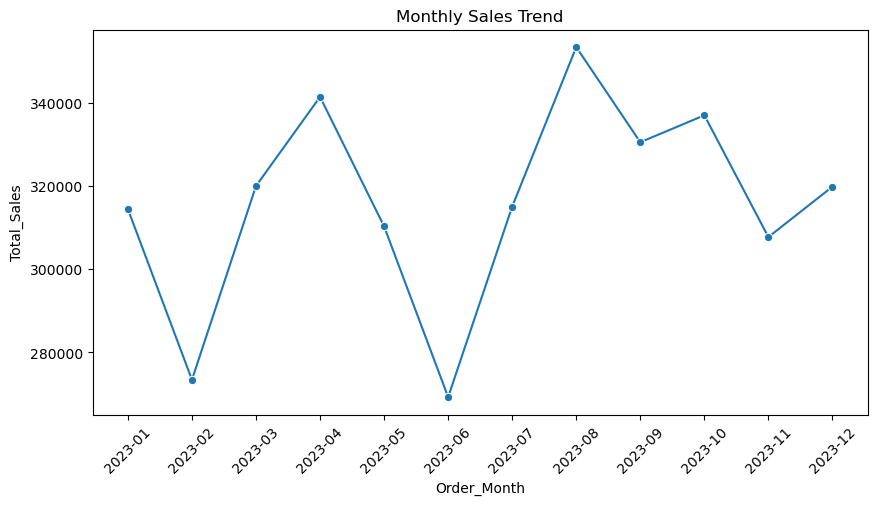

In [59]:
# 5. Trend Analysis
# ------------------------------------------------------------
print("\n--- Trend Analysis ---")

# Monthly trend
monthly_trend = df.groupby('Order_Month')['Total_Sales'].sum().reset_index()
print("\nMonthly Trend:")
display(monthly_trend)

plt.figure(figsize=(10,5))
sns.lineplot(x='Order_Month', y='Total_Sales', data=monthly_trend, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()


Top Cities by Revenue:


City
Mumbai       580369.35
Delhi        565255.77
Kolkata      557551.45
Hyderabad    557227.34
Bangalore    528798.42
Chennai      506297.33
Pune         496508.16
Name: Total_Sales, dtype: float64

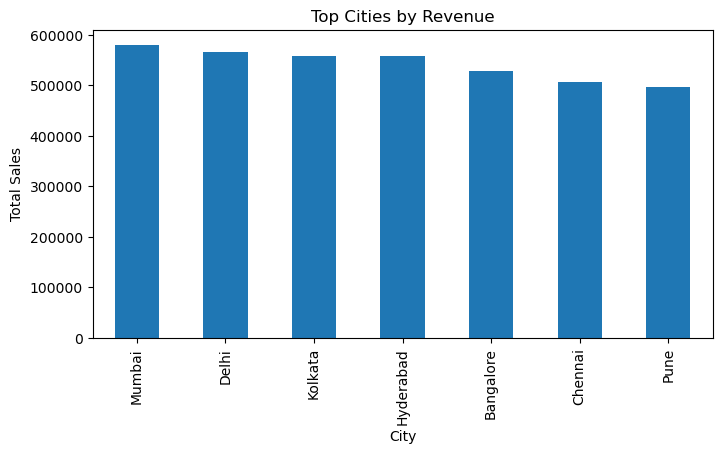

In [61]:
# City-wise performance
city_performance = df.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop Cities by Revenue:")
display(city_performance)

city_performance.plot(kind='bar', figsize=(8,4), title="Top Cities by Revenue")
plt.ylabel("Total Sales")
plt.show()



--- Customer Insights ---

Revenue by Gender:


,Gender,Total_Sales
0,F,1862640.41
1,M,1929367.41


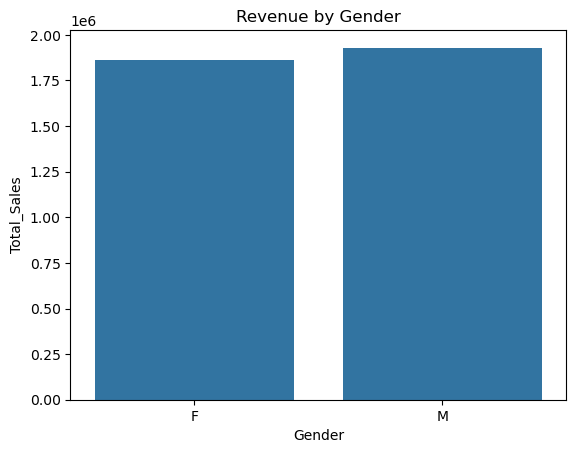

In [63]:
# 6. Customer Insights
# ------------------------------------------------------------
print("\n--- Customer Insights ---")

# Gender behavior
gender_stats = df.groupby('Gender')['Total_Sales'].sum().reset_index()
print("\nRevenue by Gender:")
display(gender_stats)

sns.barplot(x='Gender', y='Total_Sales', data=gender_stats)
plt.title("Revenue by Gender")
plt.show()


Revenue by Age Group:


C:\Users\Pramit\AppData\Local\Temp\ipykernel_62096\1820574934.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df.groupby('Age_Group')['Total_Sales'].sum().reset_index()


,Age_Group,Total_Sales
0,<25,504731.68
1,25-34,817265.82
2,35-44,806258.89
3,45-54,779669.06
4,55+,884082.37


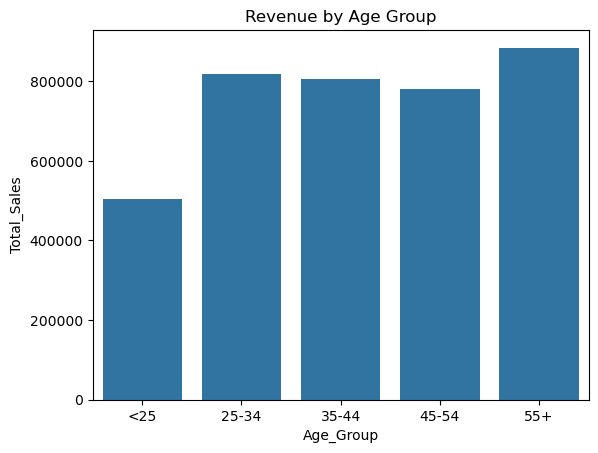

In [65]:
# Age group spending
age_spend = df.groupby('Age_Group')['Total_Sales'].sum().reset_index()
print("\nRevenue by Age Group:")
display(age_spend)

sns.barplot(x='Age_Group', y='Total_Sales', data=age_spend)
plt.title("Revenue by Age Group")
plt.show()


Preferred Payment Methods:


,Payment_Method,Count
0,Online Payment,1676
1,Credit Card,1674
2,Cash,1650


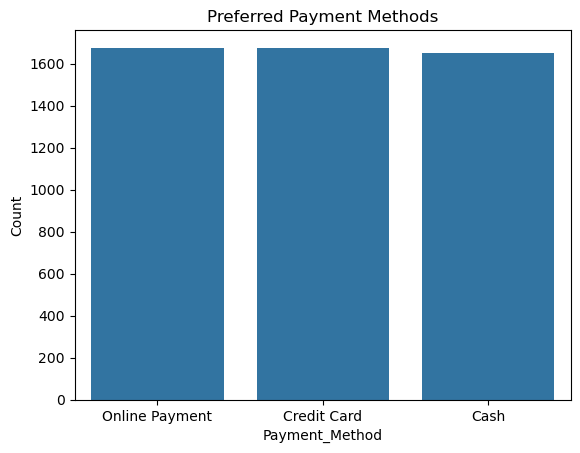

In [69]:
# Payment method preference
payment_pref = df['Payment_Method'].value_counts().reset_index()
payment_pref.columns = ['Payment_Method', 'Count']
print("\nPreferred Payment Methods:")
display(payment_pref)

sns.barplot(x='Payment_Method', y='Count', data=payment_pref)
plt.title("Preferred Payment Methods")
plt.show()


--- Product Analysis ---

Top Selling Products (Quantity):


Product_Name
Smartphone         700
Washing Machine    668
Camera             656
Jacket             656
Cricket Bat        645
Science Book       631
Jeans              629
Sneakers           627
Football           621
Smartwatch         620
Name: Quantity, dtype: int64

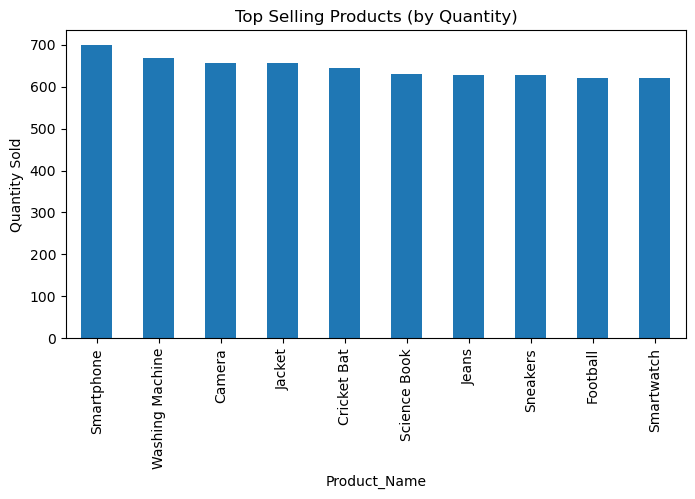

In [71]:
# 7. Product Analysis
# ------------------------------------------------------------
print("\n--- Product Analysis ---")

# Top selling products (by quantity)
top_products_qty = df.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop Selling Products (Quantity):")
display(top_products_qty)

top_products_qty.plot(kind='bar', figsize=(8,4), title="Top Selling Products (by Quantity)")
plt.ylabel("Quantity Sold")
plt.show()


Top Products by Revenue:


Product_Name
Washing Machine    172582.09
Jeans              168758.73
Jacket             167516.96
Smartphone         166310.79
Science Book       160371.10
Tennis Racket      159302.47
Basketball         157019.69
Football           155485.03
Fiction Novel      155015.51
Camera             154756.37
Name: Total_Sales, dtype: float64

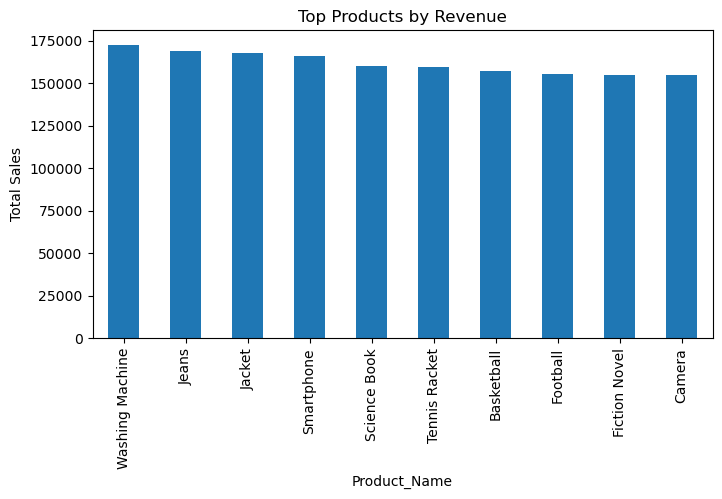

In [73]:
# Top products by revenue
top_products_revenue = df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop Products by Revenue:")
display(top_products_revenue)

top_products_revenue.plot(kind='bar', figsize=(8,4), title="Top Products by Revenue")
plt.ylabel("Total Sales")
plt.show()


--- City vs Month Revenue Heatmap ---


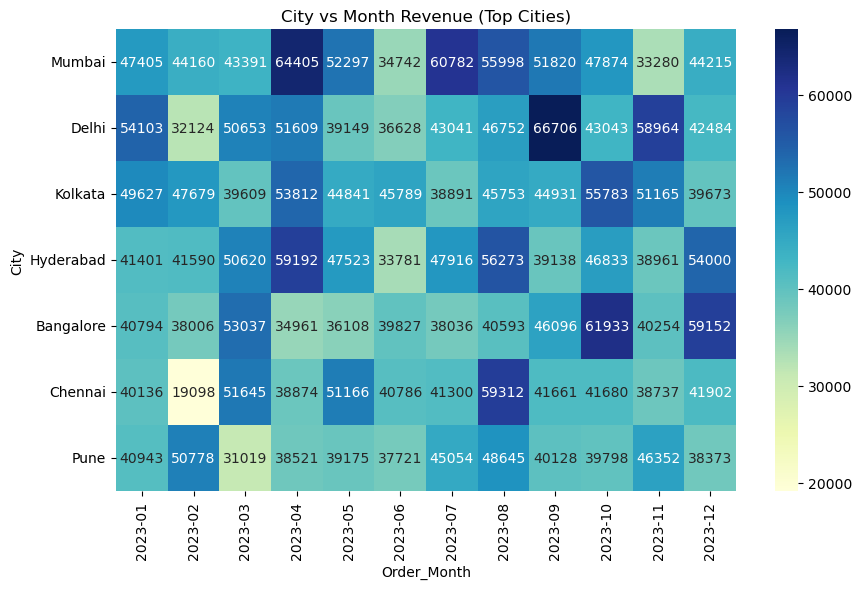

In [75]:
# 8. Heatmap - City vs Month Revenue
# ------------------------------------------------------------
print("\n--- City vs Month Revenue Heatmap ---")
city_month = df.pivot_table(index='City', columns='Order_Month', values='Total_Sales', aggfunc='sum', fill_value=0)
top_cities = city_month.sum(axis=1).sort_values(ascending=False).head(10).index

plt.figure(figsize=(10,6))
sns.heatmap(city_month.loc[top_cities], cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("City vs Month Revenue (Top Cities)")
plt.show()

In [77]:
# 9. Save cleaned dataset
# ------------------------------------------------------------
df.to_csv("retail_sales_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'retail_sales_cleaned.csv'")



Cleaned dataset saved as 'retail_sales_cleaned.csv'
